## Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## Loading and overview of dataset

In [2]:
ameo = pd.read_csv('data.csv')
ameo.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## Analysing Data

In [3]:
ameo.shape

(3998, 39)

In [4]:
ameo.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

## Data Cleaning and Transformation

### Identifying and Treating Missing Values

In [5]:
ameo.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [6]:
ameo.drop(columns = 'Unnamed: 0', inplace = True)

In [7]:
ameo['DOJ'] = pd.to_datetime(ameo['DOJ'])
present = dt.today()
ameo['DOL'] = ameo['DOL'].replace('present', present)
ameo['DOL'] = pd.to_datetime(ameo['DOL'])
ameo['DOB'] = pd.to_datetime(ameo['DOB'])

In [8]:
ameo.dtypes

ID                                int64
Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


## Identifying and categorising variables

In [9]:
ameo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [10]:
ameo_cat = ameo.select_dtypes(include=['object'])
ameo_num = ameo.select_dtypes(include=['int64', 'float64'])
ameo_cat_var = ['12graduation','CollegeTier','CollegeCityTier','GraduationYear']
# ameo_num = ameo_num[ameo_num.drop(columns = ameo_num_var,inplace = True)] -- Commented to avoid interruption
ameo_num_cat = ameo[ameo_cat_var]

In [11]:
print(ameo_cat.columns,f'\n Categorical columns: {len(ameo_cat.columns)}')

Index(['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree',
       'Specialization', 'CollegeState'],
      dtype='object') 
 Categorical columns: 8


In [12]:
print(ameo_num.columns,f'\n Categorical columns: {len(ameo_num.columns)}')

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object') 
 Categorical columns: 27


In [13]:
print(ameo_num_cat.columns,f'\n Categorical columns: {len(ameo_num_cat.columns)}')

Index(['12graduation', 'CollegeTier', 'CollegeCityTier', 'GraduationYear'], dtype='object') 
 Categorical columns: 4


In [14]:
def disc_uni_analysis(df):
    for column in df:
        print('-' * 5 + column + '-' * 5)
        print(df[column].describe(include = 'all'))
        print(df[column].value_counts())
        print('\n')
def num_uni_analysis(df):
    for column in df:
        print('-' * 5 + column + '-' * 5)
        print(df[column].agg(['mean','median','min','max','std']))
        print('\n')

In [15]:
disc_uni_analysis(ameo_cat)

-----Designation-----
count                  3998
unique                  419
top       software engineer
freq                    539
Name: Designation, dtype: object
Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64


-----JobCity-----
count          3998
unique          339
top       Bangalore
freq            627
Name: JobCity, dtype: object
JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Na

In [16]:
disc_uni_analysis(ameo_num_cat)

-----12graduation-----
count    3998.000000
mean     2008.087544
std         1.653599
min      1995.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2013.000000
Name: 12graduation, dtype: float64
12graduation
2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: count, dtype: int64


-----CollegeTier-----
count    3998.000000
mean        1.925713
std         0.262270
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: CollegeTier, dtype: float64
CollegeTier
2    3701
1     297
Name: count, dtype: int64


-----CollegeCityTier-----
count    3998.000000
mean        0.300400
std         0.458489
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CollegeCityTier, dtype: float64
CollegeCi

In [17]:
num_uni_analysis(ameo_num)

-----ID-----
mean      6.637945e+05
median    6.396000e+05
min       1.124400e+04
max       1.298275e+06
std       3.632182e+05
Name: ID, dtype: float64


-----Salary-----
mean      3.076998e+05
median    3.000000e+05
min       3.500000e+04
max       4.000000e+06
std       2.127375e+05
Name: Salary, dtype: float64


-----10percentage-----
mean      77.925443
median    79.150000
min       43.000000
max       97.760000
std        9.850162
Name: 10percentage, dtype: float64


-----12graduation-----
mean      2008.087544
median    2008.000000
min       1995.000000
max       2013.000000
std          1.653599
Name: 12graduation, dtype: float64


-----12percentage-----
mean      74.466366
median    74.400000
min       40.000000
max       98.700000
std       10.999933
Name: 12percentage, dtype: float64


-----CollegeID-----
mean       5156.851426
median     3879.000000
min           2.000000
max       18409.000000
std        4802.261482
Name: CollegeID, dtype: float64


-----CollegeTier-----
m

In [18]:
ameo_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Designation     3998 non-null   object
 1   JobCity         3998 non-null   object
 2   Gender          3998 non-null   object
 3   10board         3998 non-null   object
 4   12board         3998 non-null   object
 5   Degree          3998 non-null   object
 6   Specialization  3998 non-null   object
 7   CollegeState    3998 non-null   object
dtypes: object(8)
memory usage: 250.0+ KB


## Univariate Analysis 

### Categorical

<Axes: ylabel='Designation'>

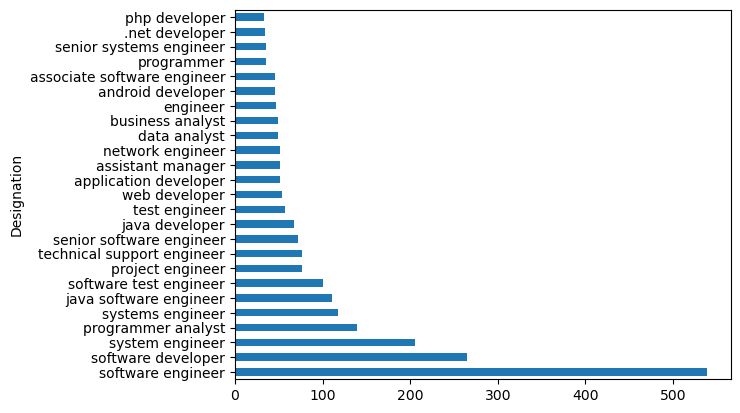

In [19]:
ameo_cat['Designation'].value_counts()[0:25].plot(kind = 'barh')

In [20]:
# Replacing -1 from the data with top 5 cities randomly 
value_to_replace = '-1'
top_values = list(ameo['JobCity'].value_counts().head(6).index)
top_values

['Bangalore', '-1', 'Noida', 'Hyderabad', 'Pune', 'Chennai']

In [21]:
mask = ameo['JobCity'] == value_to_replace
indices = ameo.index[mask]
random_values = np.random.choice(top_values, size=mask.sum())
ameo.loc[indices, 'col1'] = random_values

<Axes: ylabel='JobCity'>

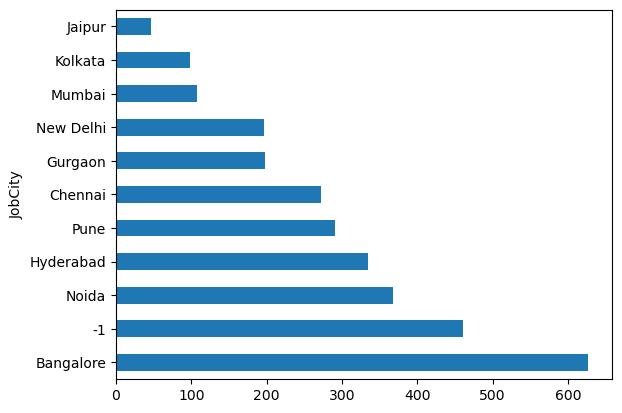

In [22]:
ameo['JobCity'].value_counts()[0:11].plot(kind = 'barh')

<Axes: ylabel='Gender'>

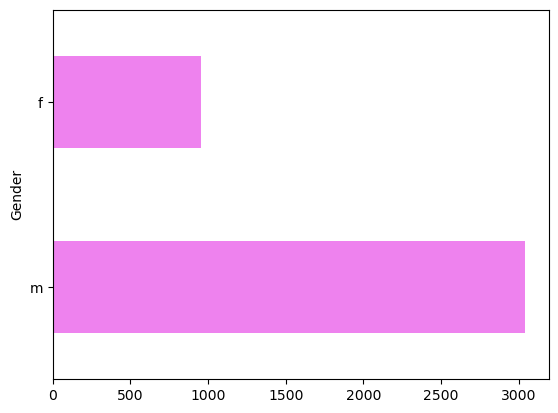

In [23]:
ameo_cat['Gender'].value_counts().plot(kind = 'barh', color = 'violet')

<Axes: ylabel='10board'>

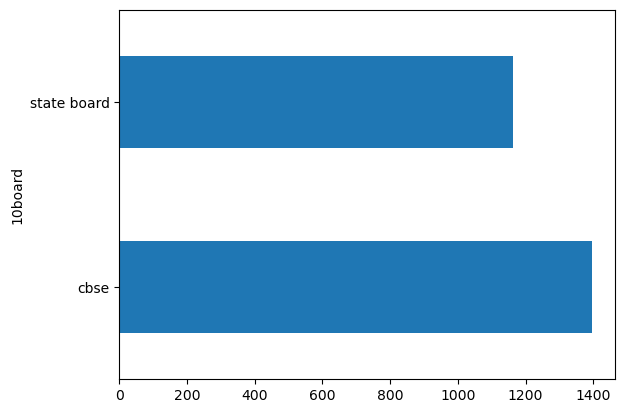

In [24]:
ameo_cat['10board'].value_counts()[0:2].plot(kind = 'barh')

<Axes: ylabel='12board'>

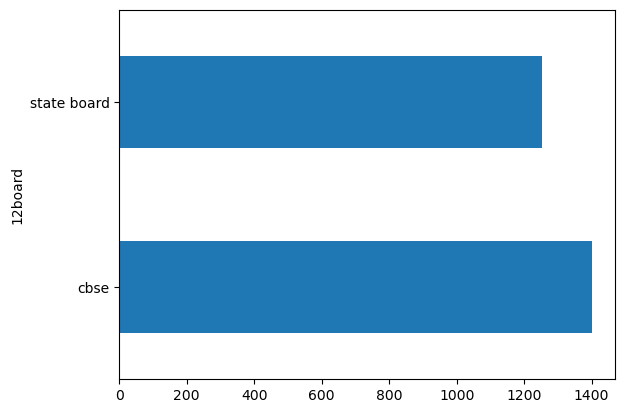

In [25]:
ameo_cat['12board'].value_counts()[0:2].plot(kind = 'barh')

<Axes: ylabel='Degree'>

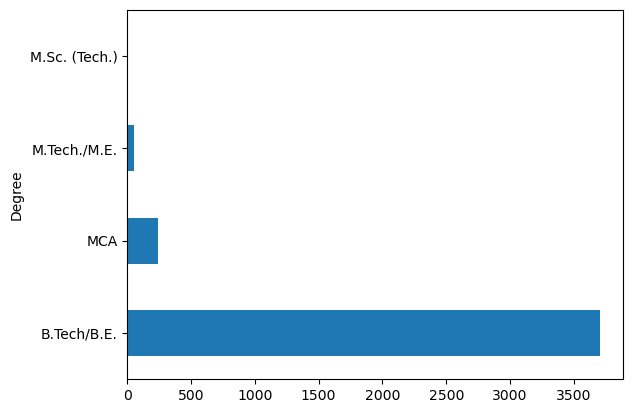

In [26]:
ameo_cat['Degree'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Specialization'>

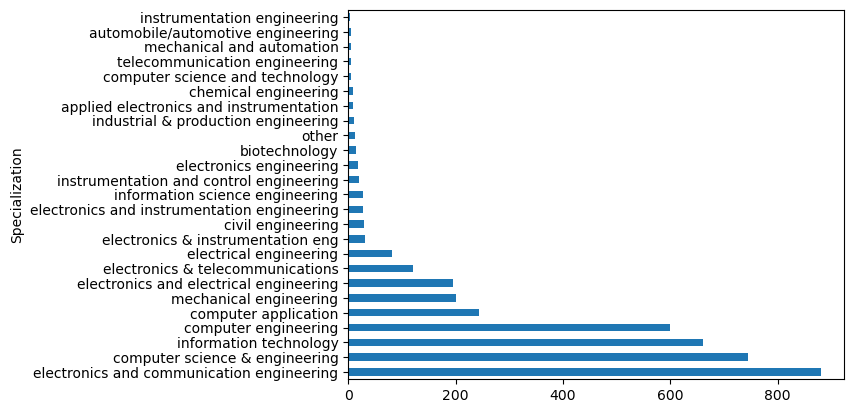

In [27]:
ameo_cat['Specialization'].value_counts()[0:25].plot(kind = 'barh')

<Axes: ylabel='CollegeState'>

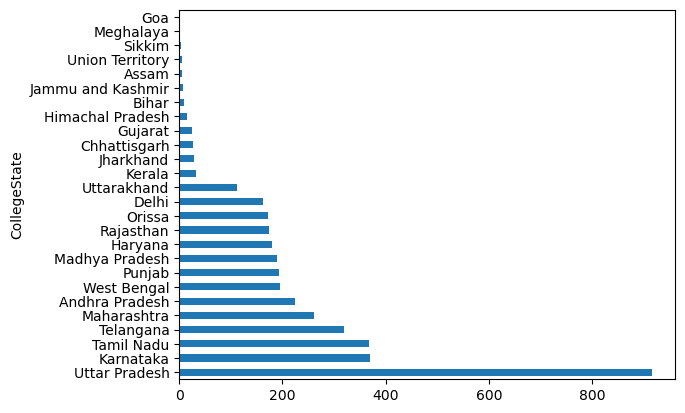

In [28]:
ameo_cat['CollegeState'].value_counts().plot(kind = 'barh')

### Numeric_Categorical

<Axes: ylabel='12graduation'>

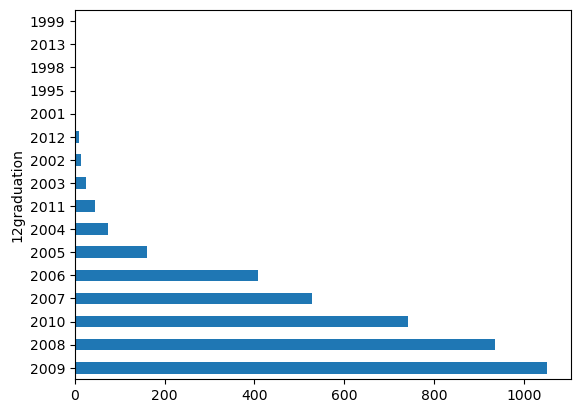

In [29]:
ameo_num_cat['12graduation'].value_counts().plot(kind = 'barh')

<Axes: ylabel='CollegeTier'>

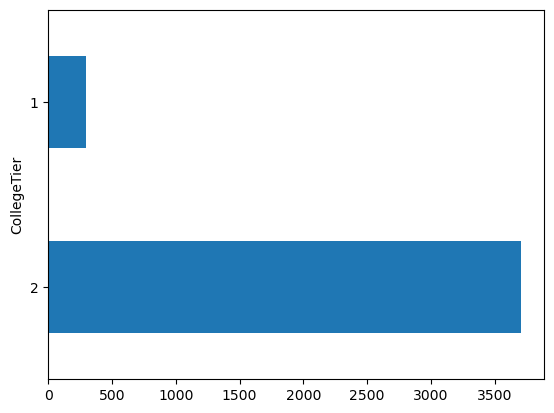

In [30]:
ameo_num_cat['CollegeTier'].value_counts().plot(kind = 'barh')

<Axes: ylabel='CollegeCityTier'>

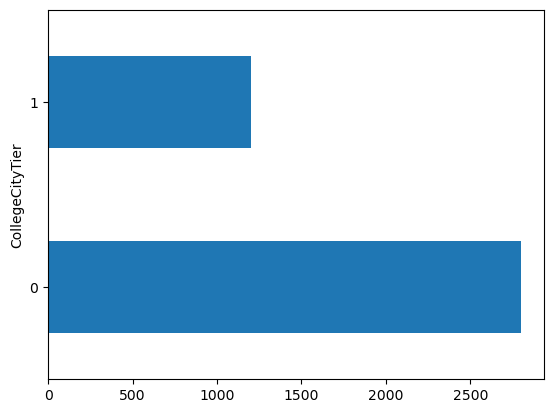

In [31]:
ameo_num_cat['CollegeCityTier'].value_counts().plot(kind = 'barh')

In [32]:
# Replacing 0 which is irrelevant data with mode of the data
ameo.loc[ameo['GraduationYear'] == 0, 'GraduationYear'] = ameo['GraduationYear'].mode()[0]

<Axes: ylabel='GraduationYear'>

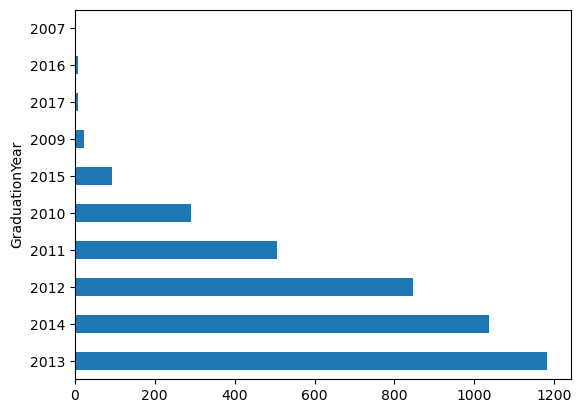

In [33]:
ameo['GraduationYear'].value_counts().plot(kind = 'barh')

<Axes: ylabel='DOJ'>

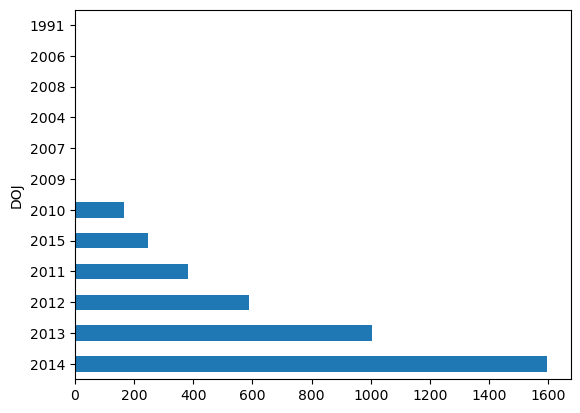

In [34]:
ameo['DOJ'].dt.year.value_counts().plot(kind = 'barh')

<Axes: ylabel='DOL'>

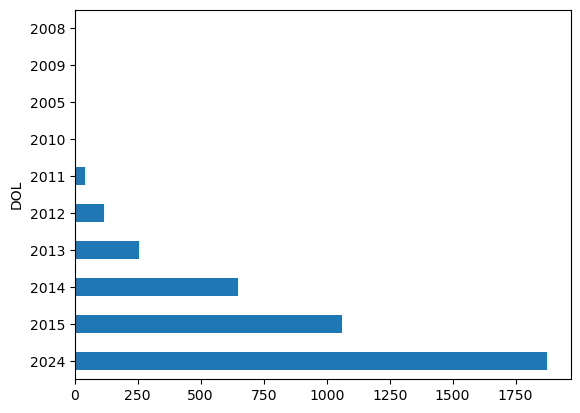

In [35]:
ameo['DOL'].dt.year.value_counts().plot(kind = 'barh')

<Axes: ylabel='DOB'>

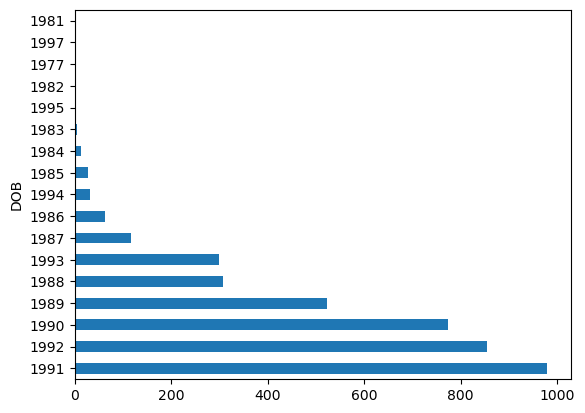

In [36]:
ameo['DOB'].dt.year.value_counts().plot(kind = 'barh')

### Numerical

<Axes: xlabel='Salary', ylabel='Density'>

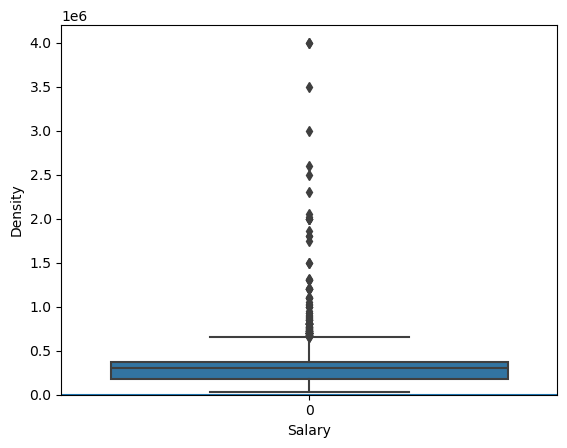

In [37]:
sns.distplot(ameo_num['Salary'])
sns.boxplot(ameo_num['Salary'])

<Axes: xlabel='10percentage', ylabel='Density'>

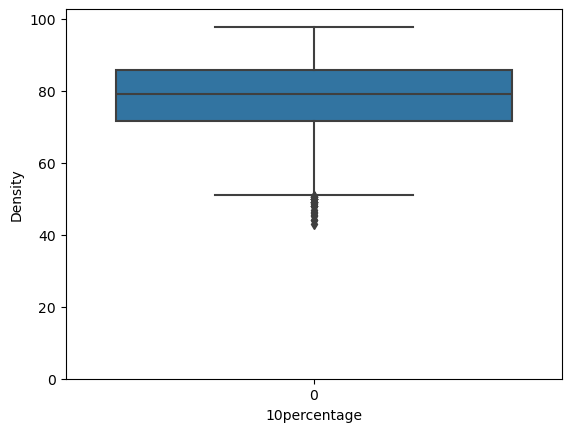

In [38]:
sns.distplot(ameo_num['10percentage'])
sns.boxplot(ameo_num['10percentage'])

<Axes: xlabel='12percentage', ylabel='Density'>

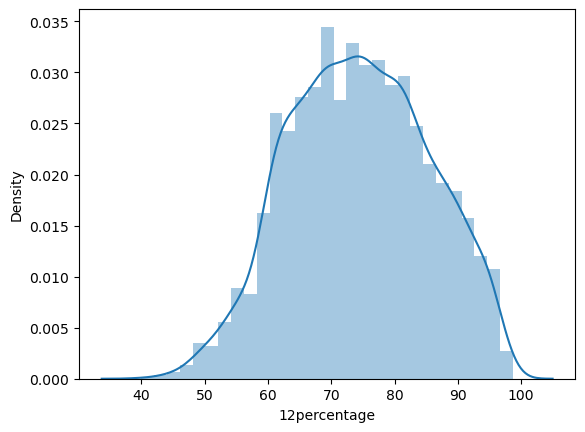

In [39]:
sns.distplot(ameo_num['12percentage'])

<Axes: xlabel='collegeGPA', ylabel='Density'>

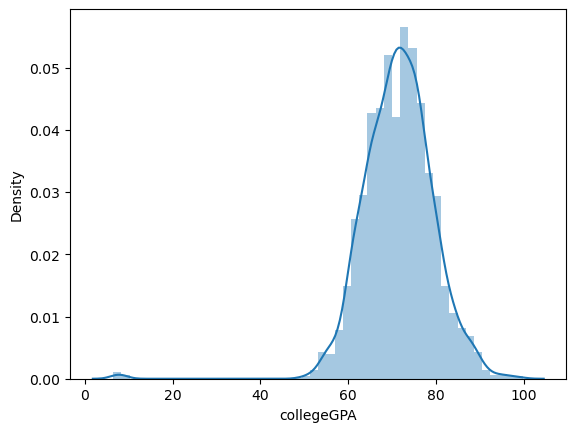

In [40]:
sns.distplot(ameo_num['collegeGPA'])

<Axes: xlabel='English', ylabel='Density'>

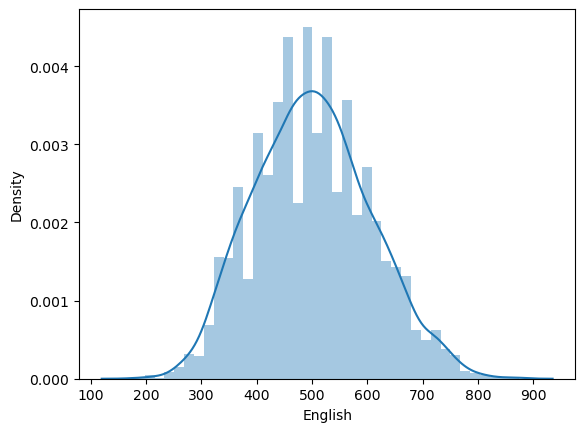

In [41]:
sns.distplot(ameo_num['English'])

<Axes: xlabel='Logical', ylabel='Density'>

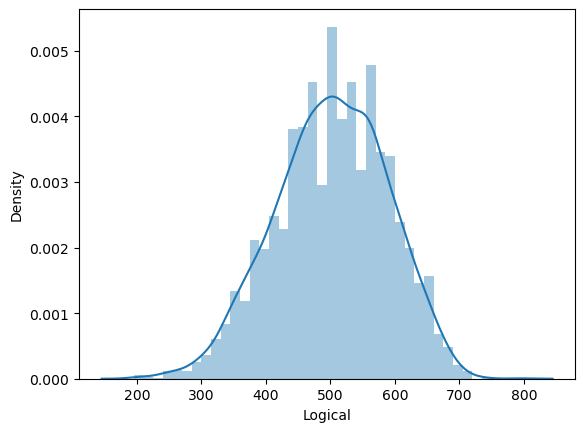

In [42]:
sns.distplot(ameo_num['Logical'])

<Axes: xlabel='Quant', ylabel='Density'>

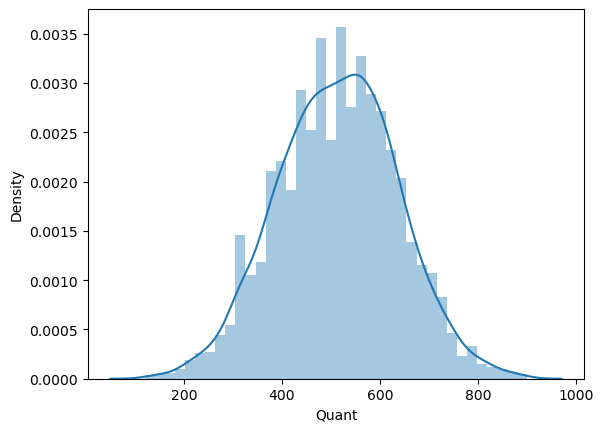

In [43]:
sns.distplot(ameo_num['Quant'])

<Axes: xlabel='Domain', ylabel='Density'>

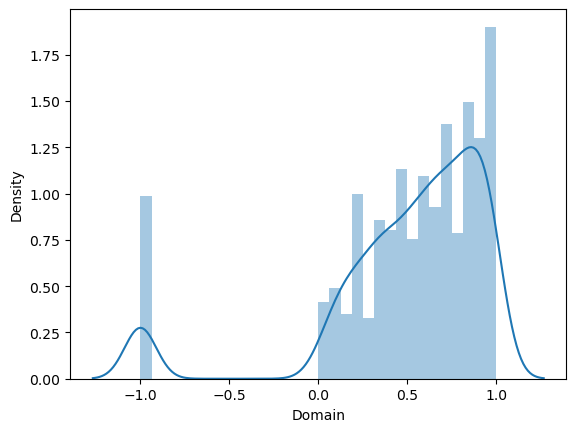

In [44]:
sns.distplot(ameo_num['Domain'])

<Axes: xlabel='ComputerProgramming', ylabel='Density'>

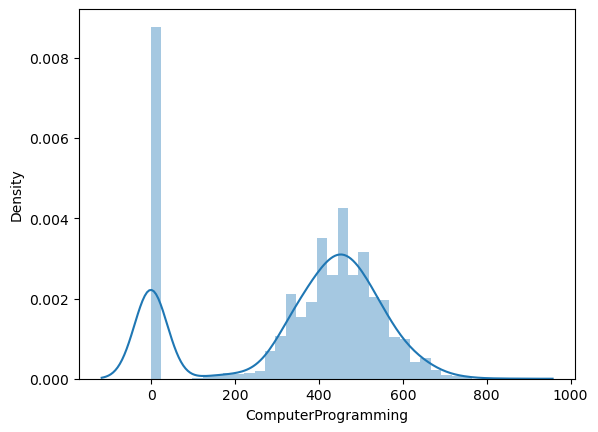

In [45]:
sns.distplot(ameo_num['ComputerProgramming'])

<Axes: xlabel='ElectronicsAndSemicon', ylabel='Density'>

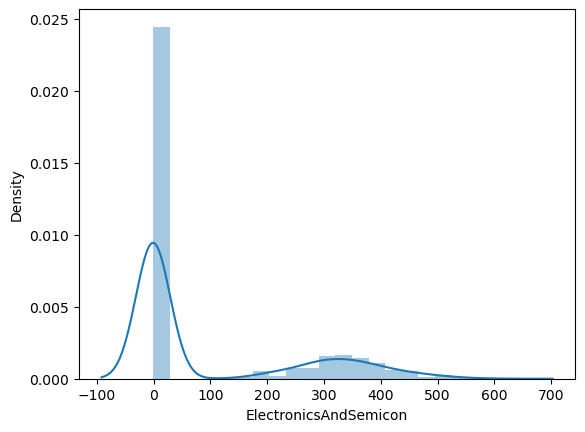

In [46]:
sns.distplot(ameo_num['ElectronicsAndSemicon'])

<Axes: xlabel='ComputerScience', ylabel='Density'>

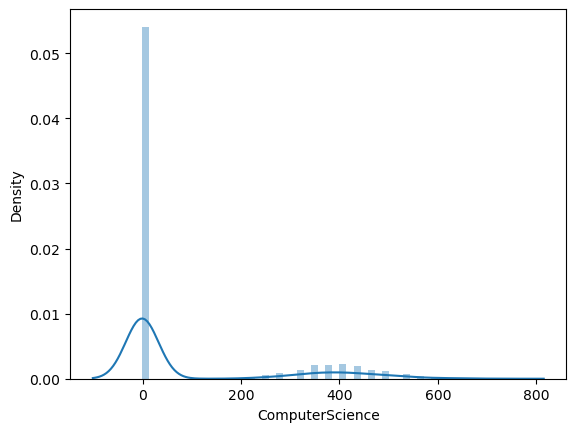

In [47]:
sns.distplot(ameo_num['ComputerScience'])

<Axes: xlabel='MechanicalEngg', ylabel='Density'>

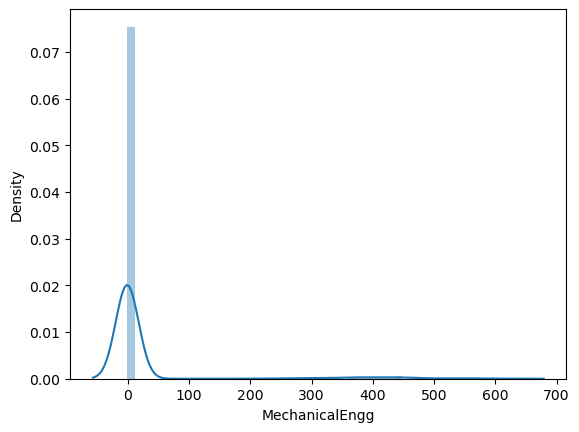

In [48]:
sns.distplot(ameo_num['MechanicalEngg'])

<Axes: xlabel='ElectricalEngg', ylabel='Density'>

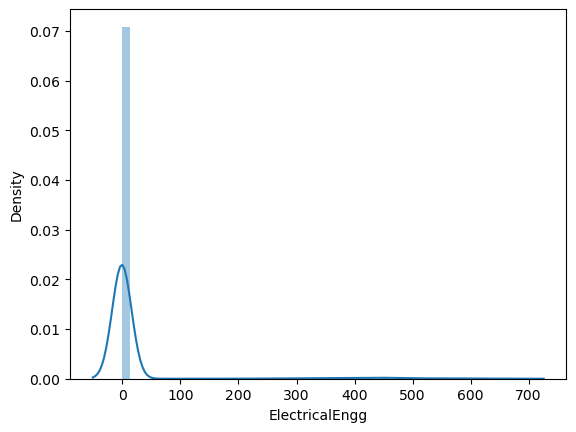

In [49]:
sns.distplot(ameo_num['ElectricalEngg'])

<Axes: xlabel='TelecomEngg', ylabel='Density'>

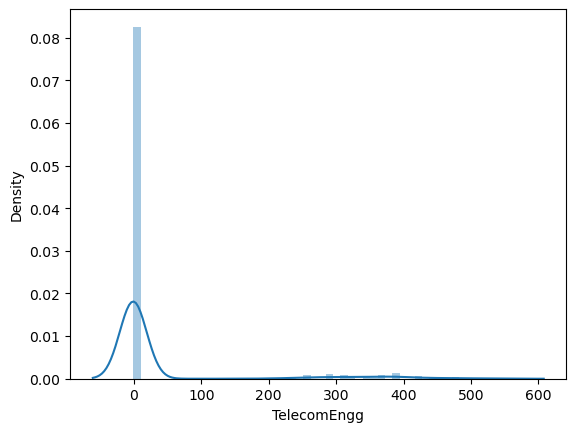

In [50]:
sns.distplot(ameo_num['TelecomEngg'])

<Axes: xlabel='CivilEngg', ylabel='Density'>

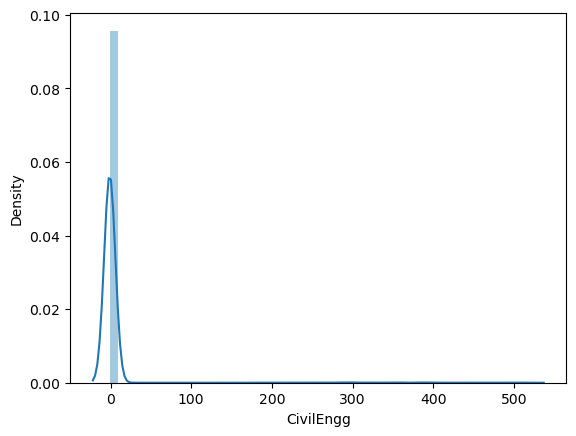

In [51]:
sns.distplot(ameo_num['CivilEngg'])

<Axes: xlabel='conscientiousness', ylabel='Density'>

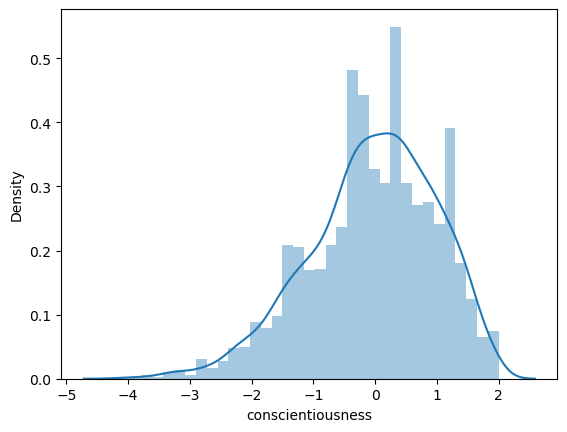

In [52]:
sns.distplot(ameo_num['conscientiousness'])

<Axes: xlabel='agreeableness', ylabel='Density'>

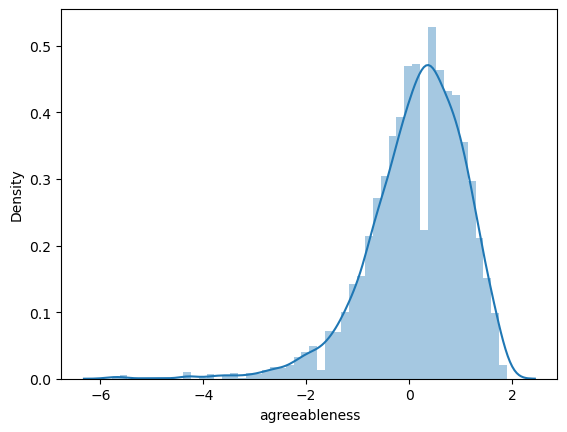

In [53]:
sns.distplot(ameo_num['agreeableness'])

<Axes: xlabel='extraversion', ylabel='Density'>

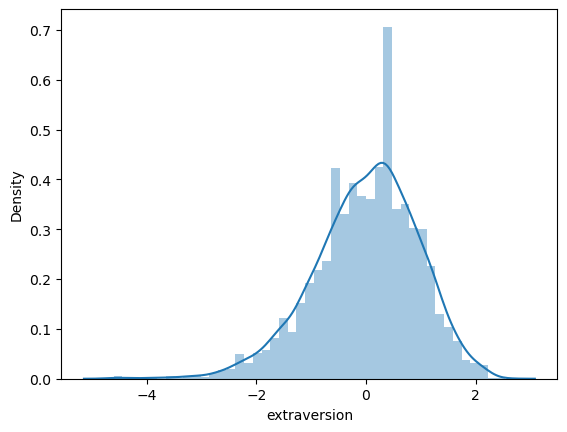

In [54]:
sns.distplot(ameo_num['extraversion'])

<Axes: xlabel='nueroticism', ylabel='Density'>

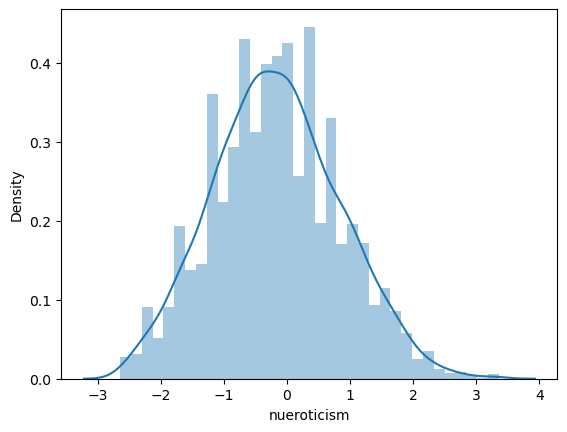

In [55]:
sns.distplot(ameo_num['nueroticism'])

<Axes: xlabel='openess_to_experience', ylabel='Density'>

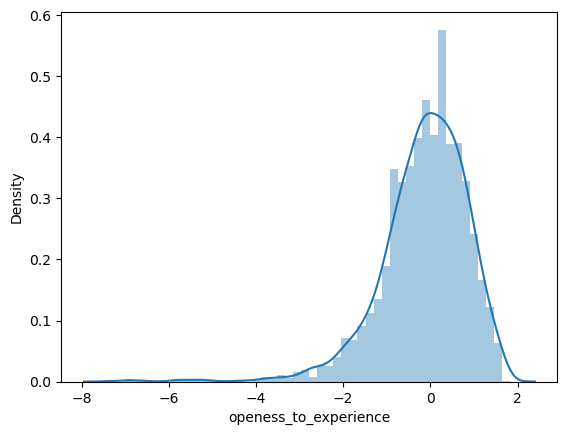

In [56]:
sns.distplot(ameo_num['openess_to_experience'])

## Bivariate Analysis 

<Axes: xlabel='10percentage', ylabel='Salary'>

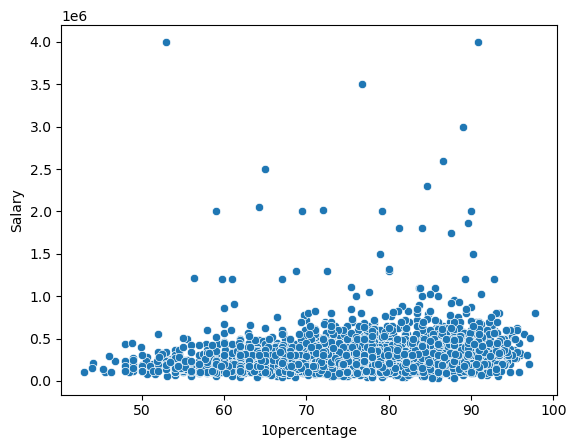

In [57]:
sns.scatterplot(x = ameo['10percentage'],y = ameo['Salary']) # Salary vs 10percentage

<Axes: xlabel='12percentage', ylabel='Salary'>

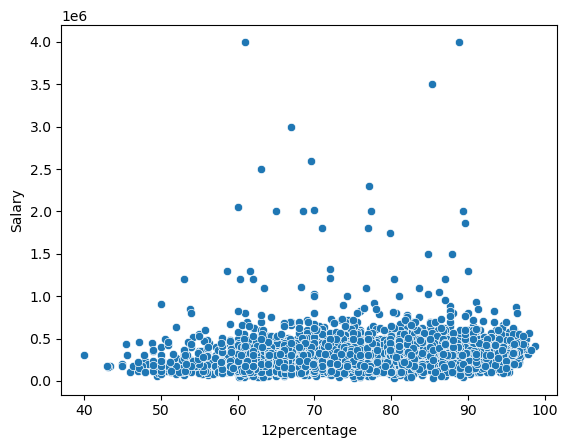

In [58]:
sns.scatterplot(x = ameo['12percentage'],y = ameo['Salary']) # Salary vs 12percentage

<Axes: xlabel='collegeGPA', ylabel='Salary'>

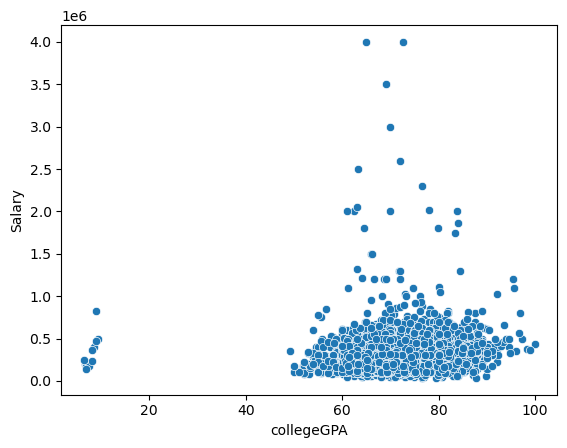

In [59]:
sns.scatterplot(x = ameo['collegeGPA'],y = ameo['Salary']) # Salary vs collegeGPA

<Axes: xlabel='English', ylabel='Salary'>

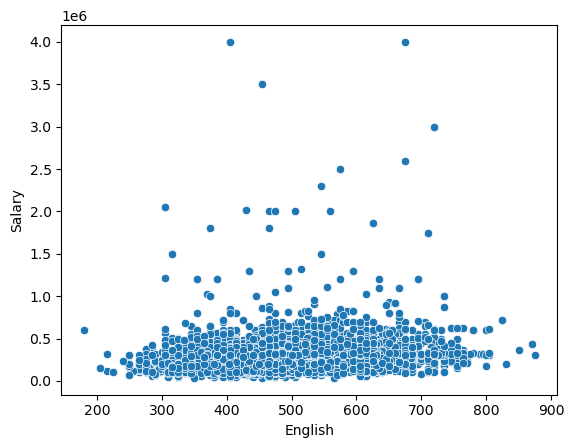

In [60]:
sns.scatterplot(x = ameo['English'],y = ameo['Salary']) # Salary vs English

<Axes: xlabel='Logical', ylabel='Salary'>

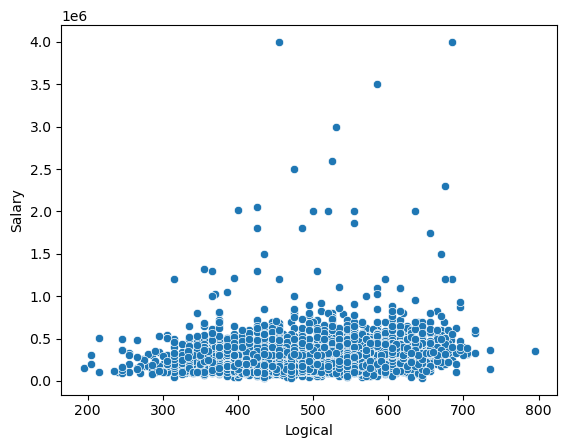

In [61]:
sns.scatterplot(x = ameo['Logical'],y = ameo['Salary']) # Salary vs Logical

<Axes: xlabel='Quant', ylabel='Salary'>

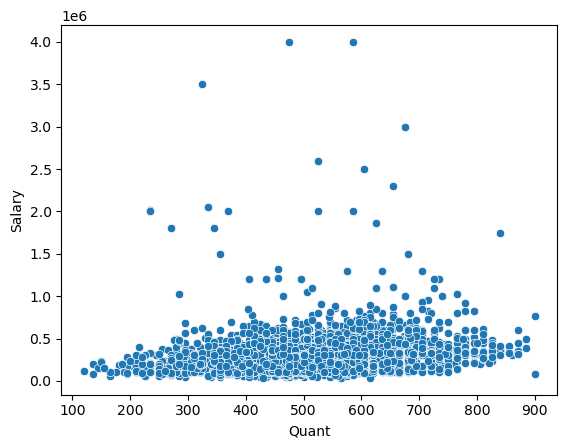

In [62]:
sns.scatterplot(x = ameo['Quant'],y = ameo['Salary']) # Salary vs Quant

<Axes: xlabel='CollegeTier', ylabel='Salary'>

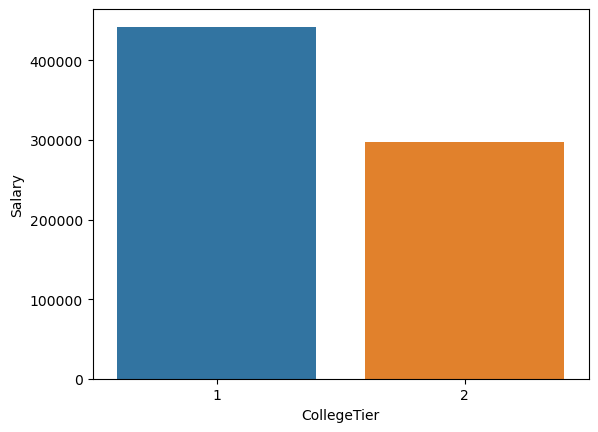

In [63]:
sns.barplot(x = ameo['CollegeTier'],y = ameo['Salary'],ci = None) # Salary vs CollegeTier

<Axes: xlabel='CollegeCityTier', ylabel='Salary'>

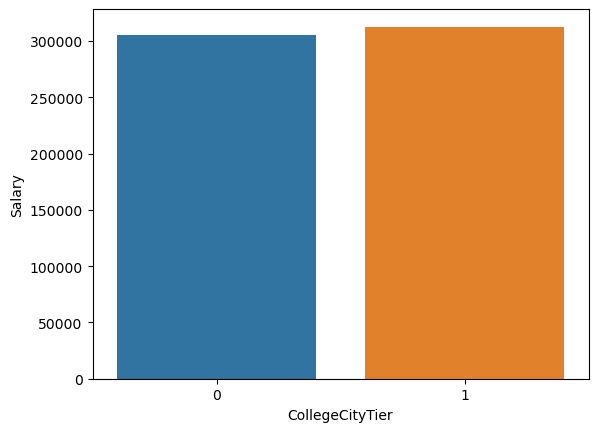

In [64]:
sns.barplot(x = ameo['CollegeCityTier'],y = ameo['Salary'],ci = None) # Salary vs CollegeCityTier

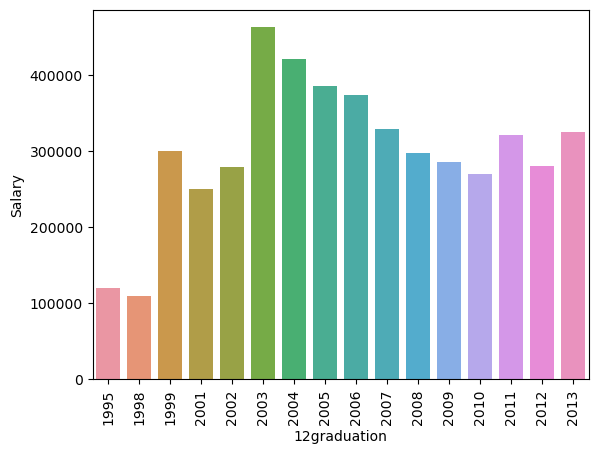

In [65]:
sns.barplot(y=ameo['Salary'], x=ameo['12graduation'],ci = None) # Salary vs 12graduation
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='GraduationYear', ylabel='Salary'>

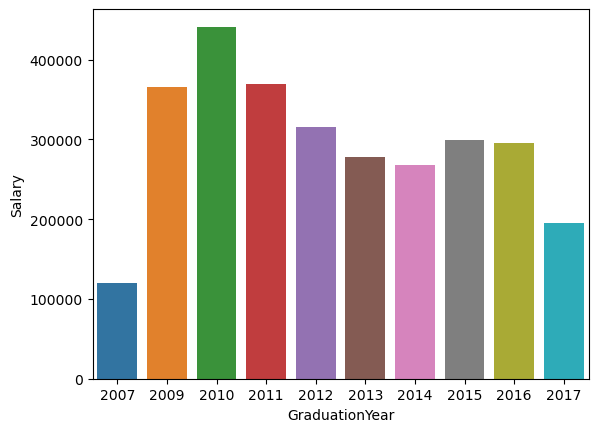

In [66]:
sns.barplot(y=ameo['Salary'], x=ameo['GraduationYear'],ci = None) # Salary vs GraduationYear

In [67]:
ameo_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Designation     3998 non-null   object
 1   JobCity         3998 non-null   object
 2   Gender          3998 non-null   object
 3   10board         3998 non-null   object
 4   12board         3998 non-null   object
 5   Degree          3998 non-null   object
 6   Specialization  3998 non-null   object
 7   CollegeState    3998 non-null   object
dtypes: object(8)
memory usage: 250.0+ KB


<Axes: xlabel='Gender', ylabel='Salary'>

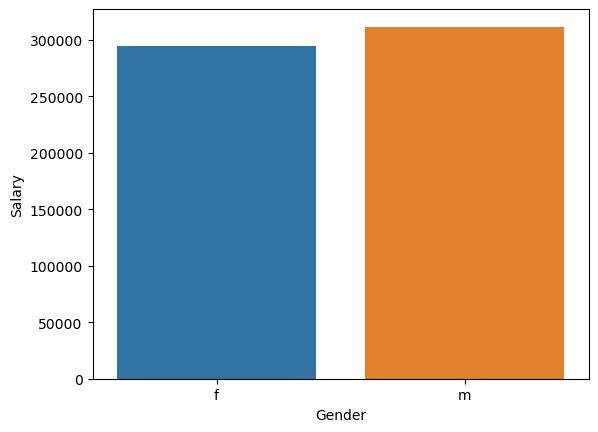

In [68]:
sns.barplot(y=ameo['Salary'], x=ameo['Gender'],ci = None)

<Axes: xlabel='Degree', ylabel='Salary'>

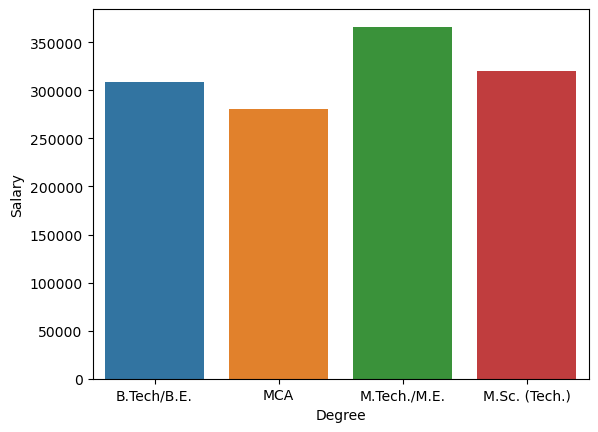

In [69]:
sns.barplot(y=ameo['Salary'], x=ameo['Degree'],ci = None)

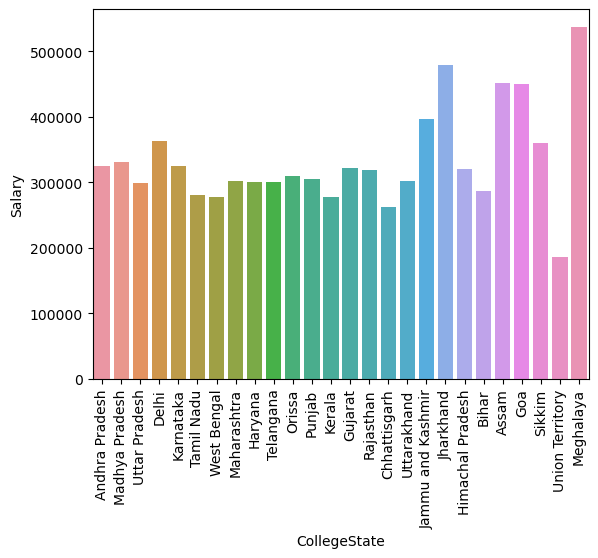

In [70]:
sns.barplot(y=ameo['Salary'], x=ameo['CollegeState'],ci = None)
plt.xticks(rotation=90)
plt.show()

## Hypothesis Testing

In [71]:
ameo['Specialization'] = ameo['Specialization'].str.lower()
ameo['Designation'] = ameo['Designation'].str.lower()
hypo_1 = ameo[(ameo['Specialization'] == 'computer science & engineering') &
                   (ameo['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']))]
print(hypo_1.iloc[0:,[4,16]].value_counts())
print(f'Total Favourable Count: {len(hypo_1)}')

Designation         Specialization                
software engineer   computer science & engineering    139
programmer analyst  computer science & engineering     26
associate engineer  computer science & engineering      2
Name: count, dtype: int64
Total Favourable Count: 167


In [72]:
hypo_1['Salary'].mean()

331526.9461077844

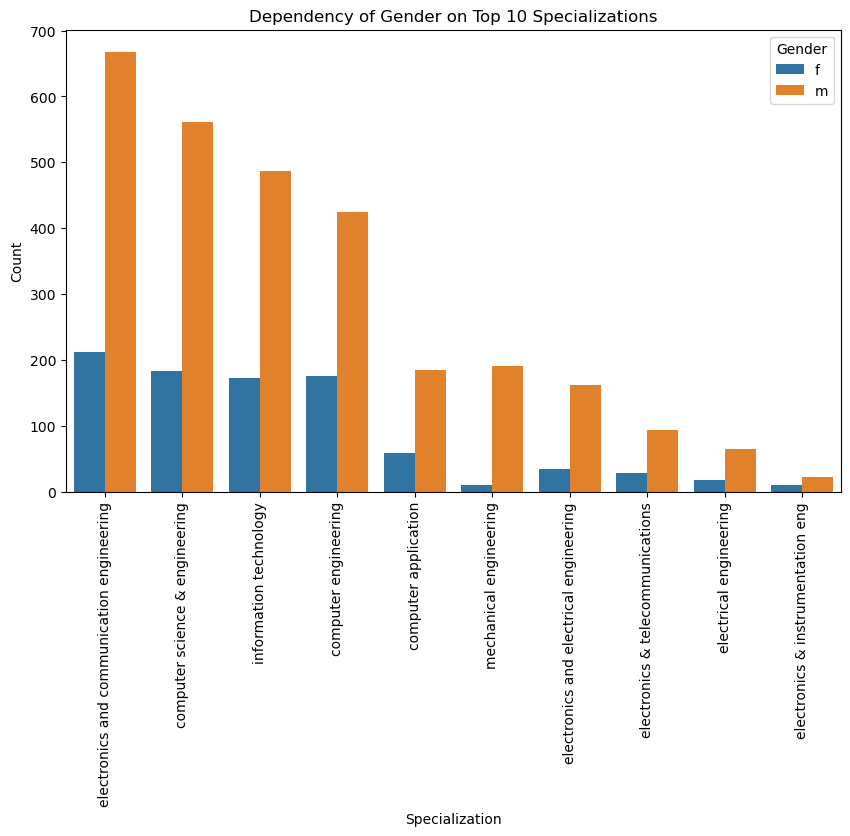

In [73]:
# Get top 10 specializations
top_10_specializations = ameo['Specialization'].value_counts().head(10).index

# Filter DataFrame for top 10 specializations
ameo_top_10 = ameo[ameo['Specialization'].isin(top_10_specializations)]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Specialization', hue='Gender', data=ameo_top_10, order=top_10_specializations)
plt.xticks(rotation=90)
plt.title('Dependency of Gender on Top 10 Specializations')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


In [74]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(ameo['Gender'], ameo['Specialization'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is evidence to reject the null hypothesis. Gender and specialization are dependent.")
else:
    print("There is no evidence to reject the null hypothesis. Gender and specialization are independent.")


Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
There is evidence to reject the null hypothesis. Gender and specialization are dependent.
